## LQR Theory
The Linear Quadratic Regulator solves the optimal control problem for a discrete-time linear time-invariant (LTI) system:

$
x_{k+1} = A x_k + B u_k
$

with the infinite-horizon cost function:

$
J = \sum_{k=0}^\infty \left( x_k^\top Q x_k + u_k^\top R u_k \right)
$

The optimal control law is:
$
u_k = -K x_k
$
where $ K = (R + B^\top P B)^{-1} B^\top P A $, and $ P $ is the solution of the Discrete Algebraic Riccati Equation (DARE):

$
P = A^\top P A - A^\top P B (R + B^\top P B)^{-1} B^\top P A + Q
$

This ensures asymptotic stability when $ (A,B) $ is controllable and $ Q \succeq 0, R \succ 0 $.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.linalg import solve_discrete_are

# LQR Controller — Homework Notebook
This notebook guides you through implementing a Linear Quadratic Regulator (LQR) to stabilize a discrete-time linear system.
You will complete the missing parts marked as `# TODO`.
---

In [39]:
# TODO: Define system matrices for a discrete-time LTI system
# Example: simple 2D system
# A = ...
# B = ...

# system dynamics

A = np.array([
    [1.1, 0.4],
    [0.0, 1.05]
])

B = np.array([
    [0.0],
    [1.0]
])


# Choose cost weights
# Q = ...
# R = ...
Q = np.array([
    [1.0, 0.0],
    [0.0, 5.0]
])

R = np.array([
    [1.0]
])


In [40]:
# TODO: Solve DARE and compute LQR gain K
# P = continious discrete transition
# K = Solve Ricatti equation

# solve discrete algebraic riccati equation of scipy library

P = solve_discrete_are(A, B, Q, R)

# linear algebra inverse of numpy library

K = np.linalg.inv(R + B.T @ P @ B) @ (B.T @ P @ A)


In [41]:
# TODO: Simulate the closed-loop system
T = 50  # time steps
x = np.array([[2.0], [-1.0]])  # initial state
x_hist = [x.copy()]

for _ in range(T):
    # u = ...
    u = -K @ x
    # x = ...
    x = A @ x + B @ u
    x_hist.append(x.copy())

x_hist = np.hstack(x_hist)

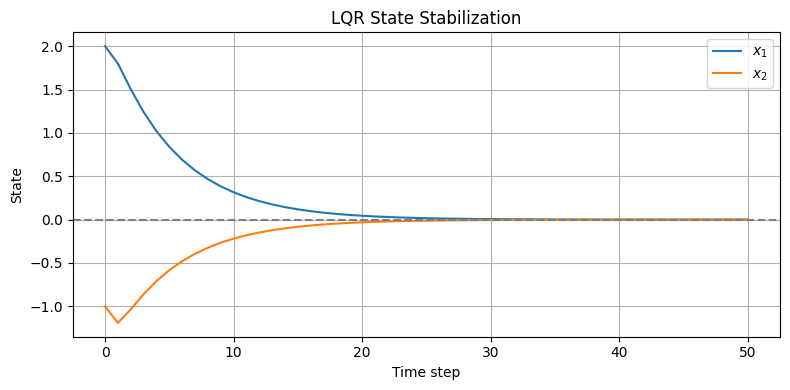

In [42]:
plt.figure(figsize=(8,4))
plt.plot(x_hist[0,:], label='$x_1$')
plt.plot(x_hist[1,:], label='$x_2$')
plt.axhline(0, color='gray', linestyle='--')
plt.title('LQR State Stabilization')
plt.xlabel('Time step')
plt.ylabel('State')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

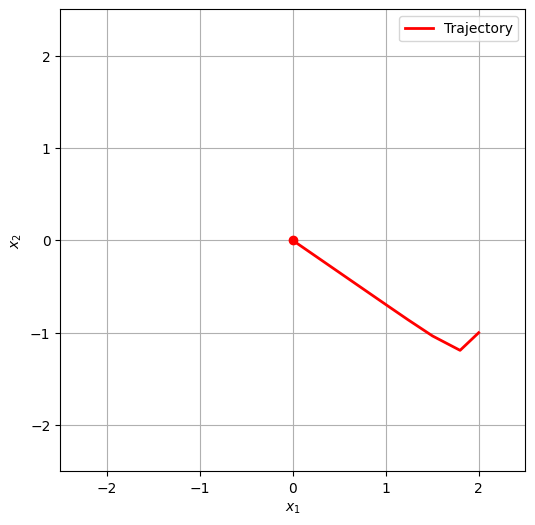

In [43]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.grid(True)
line, = ax.plot([], [], 'r-', lw=2, label='Trajectory')
point, = ax.plot([], [], 'ro')
ax.legend()

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def update(frame):
    if frame < 2:
        line.set_data([], [])
        point.set_data([], [])
    else:
        line.set_data(list(x_hist[0, :frame]), list(x_hist[1, :frame]))
        point.set_data([x_hist[0, frame]], [x_hist[1, frame]])
    return line, point

ani = FuncAnimation(fig, update, frames=T, init_func=init, blit=True)
HTML(ani.to_html5_video())